<a href="https://colab.research.google.com/github/maryam-shchgh/nn-project-collection/blob/main/MNIST_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
print(torch.__version__)
print(torch.version.cuda)

2.4.1+cu121
12.1


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

**Data Preparation**

In [5]:
#Building the transformer
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#Loading the train data
trainset = datasets.MNIST(root ='./data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

#Loading the test dataset
testset = datasets.MNIST(root ='./data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20280943.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 616632.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4688984.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2512268.07it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Defining the Neural Network Model**

In [6]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(28 * 28 , 128) # Input images are 28*28 pixels
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # There are 10 output classes

  def forward(self, x):
    x = x.view([-1, 28 * 28])
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Instantiate the model
model = SimpleNN()

**Loss Function and Optimizer**

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

**Training the Model**

In [8]:
epochs = 5
for epoch in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    optimizer.zero_grad()

    #Forward Pass
    output = model(images)
    loss = criterion(output, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

Epoch 1, Loss: 0.0024749401535815014
Epoch 1, Loss: 0.004915094324774834
Epoch 1, Loss: 0.007343865915147988
Epoch 1, Loss: 0.009775174197865956
Epoch 1, Loss: 0.012229187656313117
Epoch 1, Loss: 0.014670702694321492
Epoch 1, Loss: 0.017099837758647863
Epoch 1, Loss: 0.01954951011804121
Epoch 1, Loss: 0.02198760062138409
Epoch 1, Loss: 0.024441642039366114
Epoch 1, Loss: 0.026857105907855002
Epoch 1, Loss: 0.029320956293199616
Epoch 1, Loss: 0.031776725102080974
Epoch 1, Loss: 0.03424119593492195
Epoch 1, Loss: 0.03665554015112838
Epoch 1, Loss: 0.03910925774686118
Epoch 1, Loss: 0.04153005146522766
Epoch 1, Loss: 0.04394283299761286
Epoch 1, Loss: 0.046364290882021125
Epoch 1, Loss: 0.048797920568665464
Epoch 1, Loss: 0.051241107332681037
Epoch 1, Loss: 0.0536511562017998
Epoch 1, Loss: 0.05606207995018217
Epoch 1, Loss: 0.05848657500260929
Epoch 1, Loss: 0.06088939836538677
Epoch 1, Loss: 0.06330090011360803
Epoch 1, Loss: 0.06571679405057862
Epoch 1, Loss: 0.06814501280469426
Epoch 

**Testing the Model**

In [10]:
correct = 0
total = 0

with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print(f"Accuracy on the test set: {100 * correct / total}%")

Accuracy on the test set: 93.0%


**Visualizing Predictions**

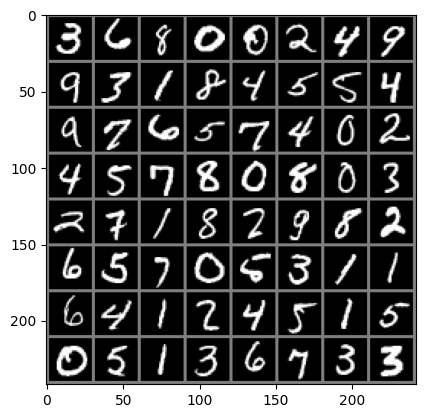

Predicted: 3 6 8 0 8 2 4 9
Actual:    3 6 8 0 0 2 4 9


In [14]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    plt.imshow(img.numpy().squeeze(), cmap='gray')
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

#Print images and their predicted labels
img_grid = torchvision.utils.make_grid(images)
img_grid = img_grid.permute(1,2,0)
imshow(img_grid)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join(f'{predicted[j].item()}' for j in range(8)))
print('Actual:   ', ' '.join(f'{labels[j].item()}' for j in range(8)))

**Saving & Loading the Model**

In [15]:
# Save the model
torch.save(model.state_dict(), 'mnist_model.pth')

# Load the model
model = SimpleNN()
model.load_state_dict(torch.load('mnist_model.pth'))

<ipython-input-15-995f95f843bf>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mnist_model.pth'))


<All keys matched successfully>